In [4]:
%%HTML
<script src = "require.js" > </script >

In [5]:
from IPython.display import HTML, display, display_html

 

HTML("""<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

 

HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

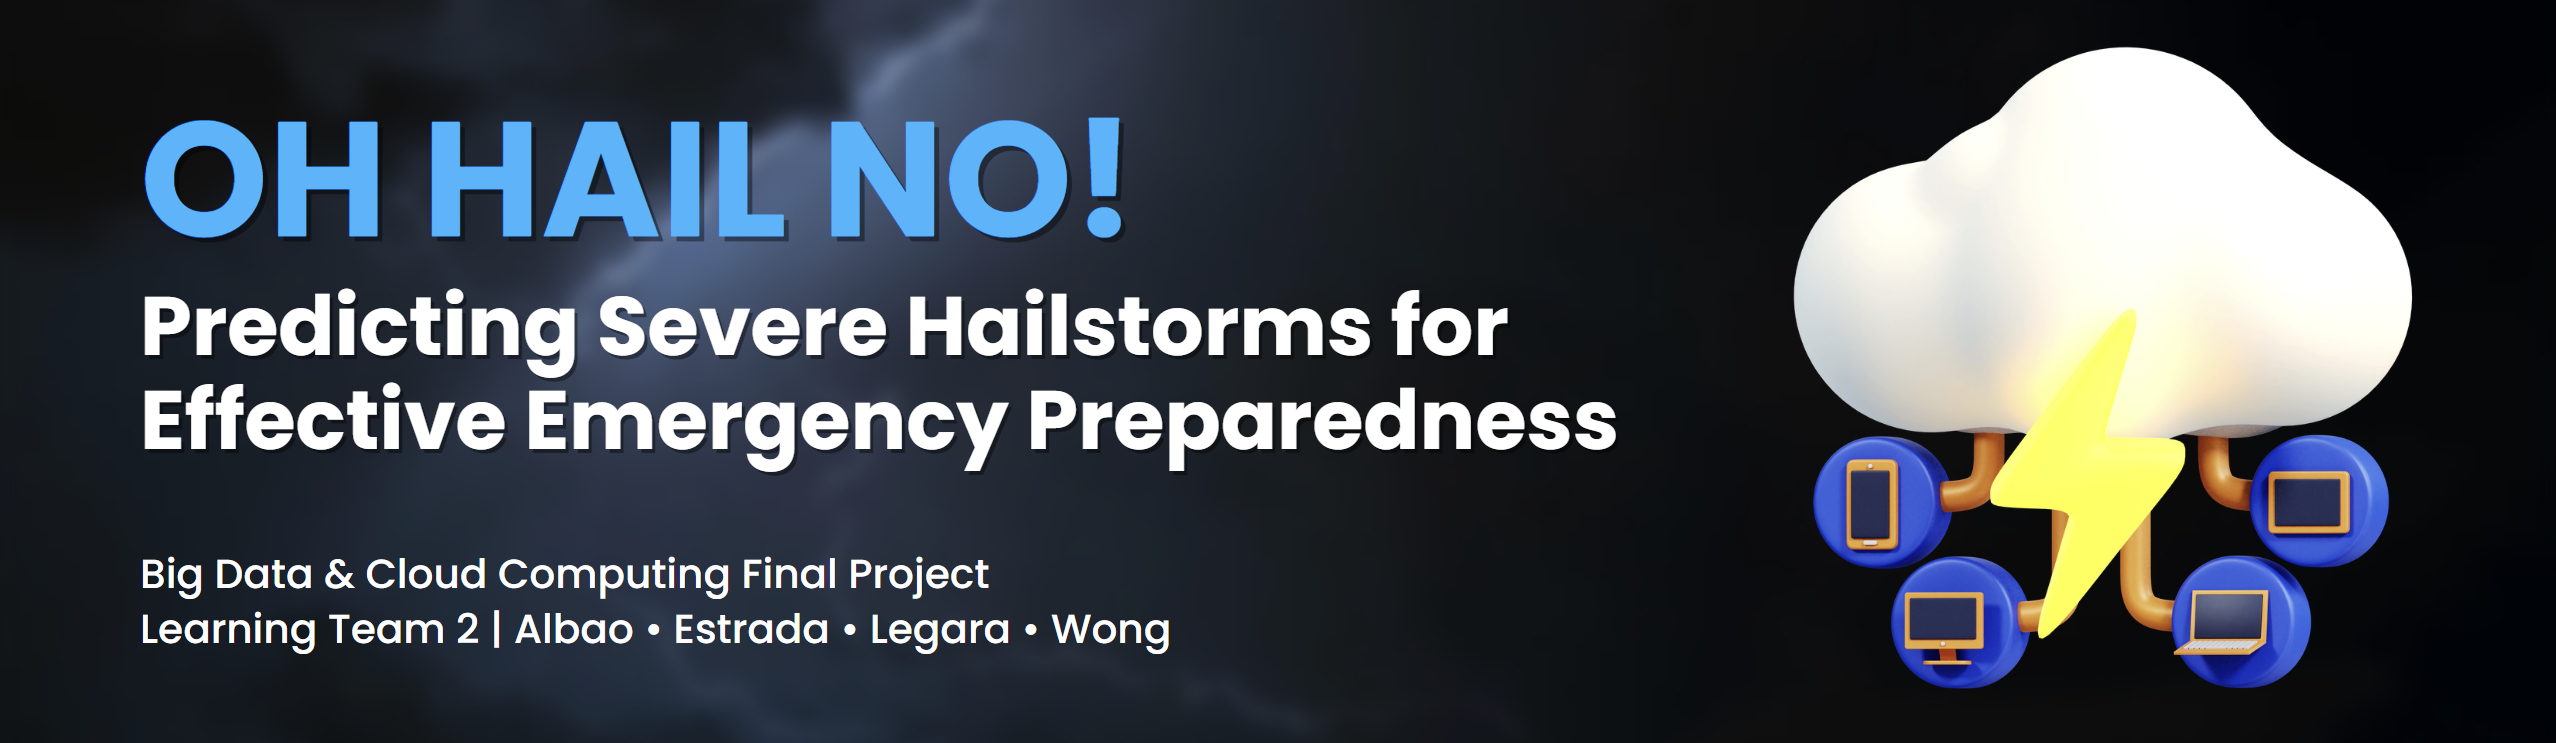

<h1 style="color: #2294ef"><b>Executive Summary</b></h1>

The report, "OH HAIL no! Predicting Severe Hailstorms for Effective Emergency Preparedness," explores the challenges and opportunities in severe weather forecasting, particularly hailstorm prediction, with a focus on leveraging machine learning and cloud computing technologies. The study is primarily motivated by a need to enhance human safety and property protection in the face of increasing severe weather events.

Key challenges in the field include issues of prediction accuracy, data validity, scalability of systems, and data accessibility. To tackle these, the report proposes a three-stage methodology comprising data collection, data exploration, and predictive modeling, utilizing extensive weather data from reputable sources such as the Registry of Open Data on Amazon Web Services and the NOAA Severe Weather Data Inventory.

The data is processed using Apache Spark and formatted in Parquet for efficiency and scalability. Following an in-depth exploratory data analysis, a machine learning model, the Random Forest Regressor, is trained to predict severe hailstorms, using variables including spatial and temporal features, Vertically Integrated Liquid (VIL), and cloud height.

Results show that the model is reasonably accurate in predicting severe hailstorms, with a Root Mean Square Error (RMSE) of 0.143 and a Mean Absolute Error (MAE) of 0.088. The model identifies the importance of features such as VIL, Max Reflection, Top Height, and geographical factors in predicting severe hailstorms, providing valuable insights into hailstorm behavior and formation.

Moving forward, the study suggests enhancements in geo-insights, model enrichment with advanced algorithms such as Long Short-Term Memory networks, and data augmentation with additional meteorological sources to improve prediction accuracy.

In summary, the report underscores the potential of machine learning and cloud computing in addressing the challenges of severe hailstorm prediction, paving the way for significant strides in weather forecasting and emergency preparedness.

 

<h1 style="color: #2294ef"><b>Introduction</b></h1>

<p style="text-align: justify">
In recent years, severe weather events have increasingly threatened human safety and economic stability worldwide. The World Meteorological Organization has reported that weather-related disasters have seen a fivefold increase over the past 50 years, causing over two million fatalities globally. Specifically, in the Philippines, severe weather events, including hailstorms, were responsible for approximately 1,000 deaths per year from 2010 to 2020. Hailstorms occur when strong updrafts within thunderstorms carry raindrops upward into extremely cold regions of the cloud. The raindrops freeze into ice pellets, which grow larger as they collide with supercooled water droplets. When the hailstones become too heavy, they fall to the ground as hail [1].
</p>

<p style="text-align: justify">
In the face of this challenge, NOAA's National Weather Service Storm Prediction Center data indicates an alarming increase in hail events in the United States, from 3,762 in 2021 to 4,436 in 2022, representing an 18% rise. However, our capacity to accurately predict these critical events remains hindered by several issues:
</p>

1. Prediction Accuracy: The inherently unpredictable nature of severe weather events leads to a lack of accurate forecasting, which in turn contributes to insufficient preparedness.
2. Data Validity: There are reliability issues inherent in the data used for forecasting, leading to potential inaccuracies in hailstorm predictions.
3. Scalability of Systems: As the volume of weather data grows, existing systems struggle to scale effectively to accommodate this increase.
4. Data Collection and Accessibility: Mechanical failures and restrictions on data access often limit the comprehensiveness of data analysis and modeling.

<p style="text-align: justify">
Born out of this context, our project aims to address these challenges by leveraging machine learning and cloud computing technologies.
</p>

<h1 style="color: #2294ef"><b>Motivation</b></h1>

<p style="text-align: justify">
Our motivation stems from the pressing need to protect human lives from the devastating effects of severe weather events. Improving prediction accuracy and timeliness can significantly enhance emergency preparedness, saving lives, and minimizing property damage.
</p>
    
<p style="text-align: justify">    
Simultaneously, this work presents an exciting scientific opportunity to explore the application of cloud computing and machine learning in weather forecasting. These technologies can help overcome the limitations of existing systems by improving data processing efficiency, enabling the handling of more complex datasets, and enhancing prediction models.
</p>
    
<p style="text-align: justify">
Through this project, we aim not only to develop a practical solution to hailstorm prediction but also to contribute to broader knowledge on harnessing modern technology to solve real-world problems.
</p>

<h1 style="color: #2294ef"><b>Problem Statement</b></h1>

<p style="text-align: justify">
Despite the increasing frequency and impact of severe weather events such as hailstorms, our ability to predict these events accurately remains challenged by several critical factors, including prediction accuracy, data validity, system scalability, and data accessibility. This difficulty in forecasting, coupled with the escalating data volume and complexity, poses a significant risk to public safety and infrastructure due to inadequate preparedness. Thus, we need to address the following question:
</p>
    
<p style="text-align: justify">
How can we effectively leverage advancements in machine learning and cloud computing to develop a system that can accurately predict severe hailstorm events, thereby improving weather warning systems, enhancing emergency preparedness, and contributing to public safety?
</p>

<h1 style="color: #2294ef"><b>Data Source</b></h1>

<p style="text-align: justify">
The data that serves as the foundation for this project is primarily sourced from the Registry of Open Data on Amazon Web Services (AWS) <a href="https://registry.opendata.aws/noaa-swdi/">[2]</a> and the NOAA Severe Weather Data Inventory (SWDI), both of which are reputable and extensive databases for severe weather events.
</p>

<p style="text-align: justify">
The data available for this study includes a range of reports: Hail, Mesocyclones, Mesoscale Discussion Areas, Storm Structure, Tornado Vortex Signatures, and Severe Weather Warnings. A documentation on these reports are available in <a href="https://www.ncdc.noaa.gov/swdiws">NOAA</a> [3]. Of these, we have decided to use the Hail and Storm Structure reports for our research, given their direct relevance to the prediction of severe hailstorm events.
In total, our raw data encompasses a massive 78 GB integrated database of severe weather events across the United States, offering a comprehensive and diverse foundation for our machine learning models.
</p>

| Column   | Data Type  | Description                                |
|----------|------------|--------------------------------------------|
| ZTIME    | StringType | Time of observation                        |
| LON      | DoubleType | Longitude coordinate of the observation     |
| LAT      | DoubleType | Latitude coordinate of the observation      |
| WSR_ID   | StringType | Weather Surveillance Radar (WSR) ID         |
| CELL_ID  | StringType | ID of the radar cell                       |
| RANGE    | DoubleType | Distance from the radar to the cell         |
| AZIMUTH  | DoubleType | Angular direction from the radar to the cell|
| SEVPROP  | DoubleType | Severity property value                     |
| PROB     | DoubleType | Probability value                           |
<p style='text-align:center'><b>Table 1.</b> Data Description of Hail Reports</p>

| Feature      | Data Type   | Description                                     |
|-------------|-------------|-------------------------------------------------|
| ZTIME       | StringType  | Time of observation                             |
| LON         | DoubleType  | Longitude coordinate of the observation          |
| LAT         | DoubleType  | Latitude coordinate of the observation           |
| WSR_ID      | StringType  | Weather Surveillance Radar (WSR) ID              |
| CELL_ID     | StringType  | ID of the radar cell                            |
| RANGE       | DoubleType  | Distance from the radar to the cell              |
| AZIMUTH     | DoubleType  | Angular direction from the radar to the cell (true north is 0)|
| BASE_HEIGHT | DoubleType  | Base height of the cloud                          |
| TOP_HEIGHT  | DoubleType  | Top height of the cloud                           |
| VIL         | DoubleType  | Vertically Integrated Liquid (VIL) measurement   |
| MAX_REFLECT | DoubleType  | Maximum reflectivity measurement in the cell     |
| HEIGHT      | DoubleType  | Height of the cloud                              |
<p style='text-align:center'><b>Table 2.</b> Data Description of Structure Reports</p>

<p style="text-align: justify">
The data encompasses critical information about each storm event, including its location, azimuth from the observing device, range from the device, Vertically Integrated Liquid (VIL), Maximum Reflection (MAX_REFLECT), and Severity Probability (SEVPROB). Each of these features provides valuable insights into the storm's nature and severity, equipping us with the necessary variables to develop an effective and accurate hailstorm prediction model.
</p>

<h1 style="color: #2294ef"><b>Methodology</b></h1>

<p style="text-align: justify">
Our methodology for this project involves three primary stages: data collection, data exploration, and predictive modeling. Each stage is crucial to our objective of developing a highly accurate machine learning model for predicting severe hailstorms.
</p>

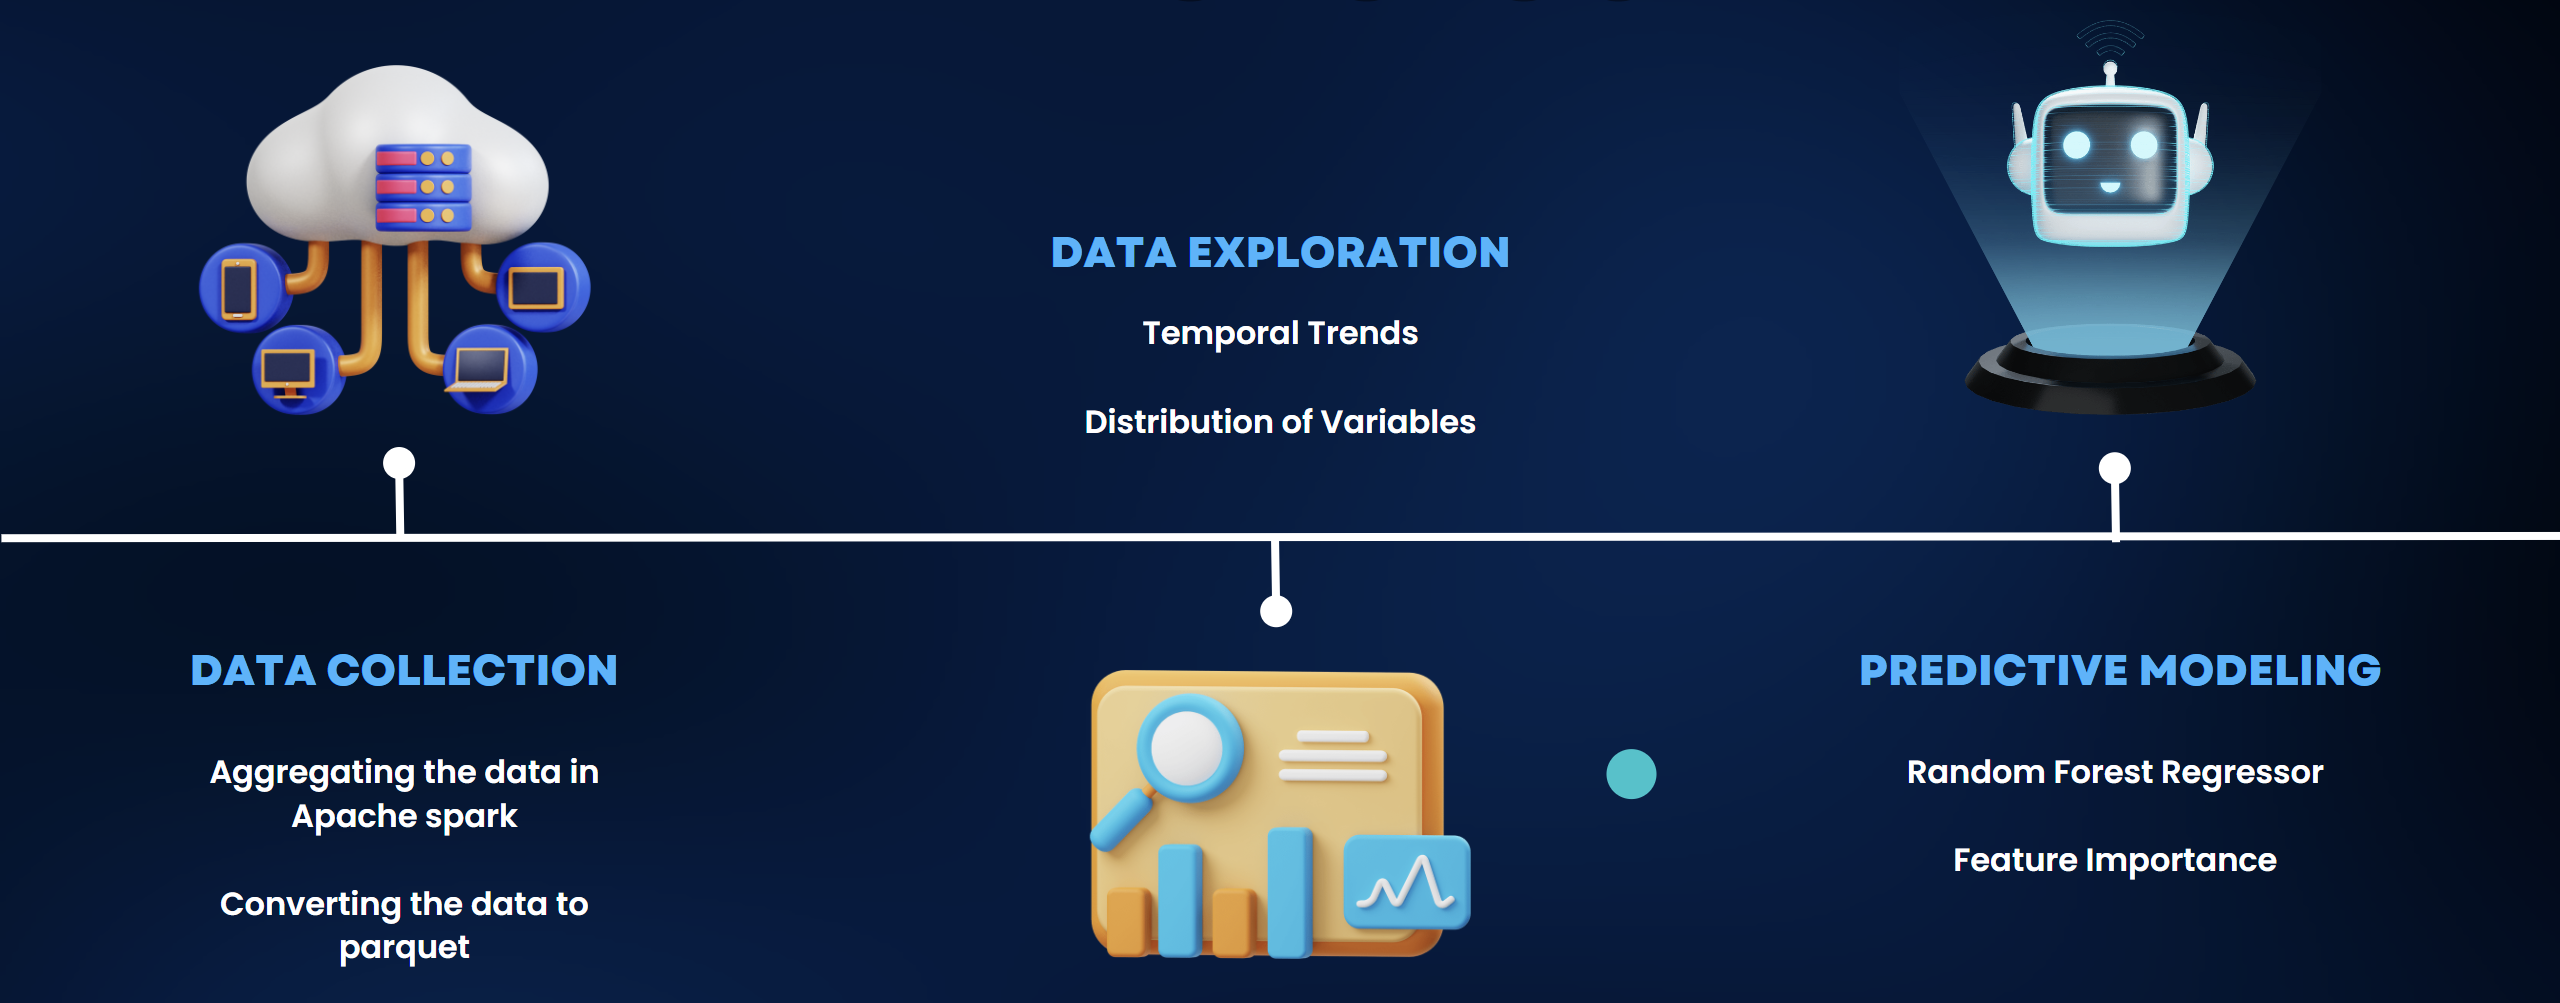

<p style='text-align:center'><b>Figure 1.</b> Methodology Pipeline</p>

**_Data Collection_**

<p style="text-align: justify">
The first step in our methodology is data collection, where we aggregate the Hail and Storm Structure data sourced from the Registry of Open Data on AWS and the NOAA Severe Weather Data Inventory. Given the vast size of the data (78GB), we use Apache Spark for this aggregation, owing to its ability to process large datasets efficiently.
</p>
    
<p style="text-align: justify">
To facilitate more efficient subsequent analyses and reduce storage costs, we convert the raw data into the Parquet format. Parquet is a columnar storage file format that is optimized for use with big data processing frameworks like Apache Spark. It allows for highly efficient and flexible data analysis, making it an excellent choice for our project. The parquet files were generated in <b>supplementary-parquet.ipynb</b>.
</p>

**_Data Exploration_**

<p style="text-align: justify">
Once we have our data collected and formatted appropriately, we move on to the exploration phase. This stage involves investigating the temporal trends within the data, which can reveal patterns and anomalies in hailstorm occurrences over time.
</p>

<p style="text-align: justify">
In addition, we explore the distribution of variables in the dataset, which helps us understand the range and common values of each variable. This step is crucial as it guides the feature selection process for our predictive modeling stage and helps us understand how different variables may influence the model's performance.
</p>

**_Predictive Modeling_**

<p style="text-align: justify">
In the final stage, we apply a machine learning approach to create a predictive model for severe hailstorms. We chose to implement a Random Forest Regressor due to its robustness against overfitting, capability to handle large datasets with many input variables, and its inherent feature to quantify the importance of each variable.
</p>
    
<p style="text-align: justify">
We train our model on the dataset, using the Severity Probability (SEVPROB) as our target variable, given its high relevance to hailstorm severity according to NOAA's criteria. The remaining features provide our model with the context necessary to make accurate predictions.
</p>
    
<p style="text-align: justify">
After training the model, we examine the Feature Importance, which indicates how much each feature contributes to the model's predictions. This analysis not only helps us understand which features are the most predictive of hailstorm events but also allows for model optimization through feature selection.
</p>

<p style="text-align: justify">
Through this methodology, we aim to develop a hailstorm prediction model that leverages machine learning's power and cloud computing's scalability to tackle the challenges of severe weather prediction.
</p>

<h1 style="color: #2294ef"><b>Data Preparation</b></h1>

In [ ]:
# spark

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# sc.install_pypi_package('pandas')
# sc.install_pypi_package('matplotlib')
# sc.install_pypi_package('seaborn')
# sc.install_pypi_package('fsspec')
# sc.install_pypi_package('s3fs ')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.types import *

from pyspark.ml.feature import VectorAssembler, VectorIndexer, StringIndexer
from pyspark.ml.regression import GBTRegressor, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.regression import RandomForestRegressionModel

<h1 style="color: #2294ef"><b>Merge the Hail dataset and Structure dataset</b></h1>

<h2 style="color: #2294ef"><b>Load the data</b></h2>

In [ ]:
s3_uri = 's3a://noaa-swdi-pds/structure-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("BASE_HEIGHT", DoubleType(), nullable=True),
    StructField("TOP_HEIGHT", DoubleType(), nullable=True),
    StructField("VIL", DoubleType(), nullable=True),
    StructField("MAX_REFLECT", DoubleType(), nullable=True),
    StructField("HEIGHT", DoubleType(), nullable=True)
])

structure = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
s3_uri = 's3a://noaa-swdi-pds/hail-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("SEVPROP", DoubleType(), nullable=True),
    StructField("PROB", DoubleType(), nullable=True)
])

hail = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
s3_uri = 's3a://noaa-swdi-pds/mda-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("STR_RANK", IntegerType(), nullable=True),
    StructField("SCIT_ID", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("LL_ROT_VEL", DoubleType(), nullable=True),
    StructField("LL_DV", DoubleType(), nullable=True),
    StructField("LL_BASE", DoubleType(), nullable=True),
    StructField("DEPTH_KFT", DoubleType(), nullable=True),
    StructField("DPTH_STMRL", DoubleType(), nullable=True),
    StructField("MAX_RV_KFT", DoubleType(), nullable=True),
    StructField("MAX_RV_KTS", DoubleType(), nullable=True),
    StructField("TVS", StringType(), nullable=True),
    StructField("MOTION_DEG", DoubleType(), nullable=True),
    StructField("MOTION_KTS", DoubleType(), nullable=True),
    StructField("MSI", StringType(), nullable=True)
])

mda = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

In [ ]:
s3_uri = 's3a://noaa-swdi-pds/meso-????.csv' # no 2021

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("CELL_TYPE", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("BASE_HEIGHT", DoubleType(), nullable=True),
    StructField("TOP_HEIGHT", DoubleType(), nullable=True),
    StructField("HEIGHT", DoubleType(), nullable=True),
    StructField("RADIUS", DoubleType(), nullable=True),
    StructField("AZDIA", DoubleType(), nullable=True),
    StructField("SHEAR", DoubleType(), nullable=True)
])

meso = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

In [ ]:
s3_uri = 's3a://noaa-swdi-pds/tvs-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), True),
    StructField("LON", DoubleType(), True),
    StructField("LAT", DoubleType(), True),
    StructField("WSR_ID", StringType(), True),
    StructField("CELL_ID", StringType(), True),
    StructField("CELL_TYPE", StringType(), True),
    StructField("RANGE", DoubleType(), True),
    StructField("AZIMUTH", DoubleType(), True),
    StructField("AVGDV", DoubleType(), True),
    StructField("LLDV", DoubleType(), True),
    StructField("MXDV", DoubleType(), True),
    StructField("MXDV_HEIGHT", DoubleType(), True),
    StructField("DEPTH", DoubleType(), True),
    StructField("BASE", DoubleType(), True),
    StructField("TOP", DoubleType(), True),
    StructField("MAX_SHEAR", DoubleType(), True),
    StructField("MAX_SHEAR_HEIGHT", DoubleType(), True)
])

tvs = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

<h2 style="color: #2294ef"><b>Engineer datetime features</b></h2>

In [ ]:
hail = (
    hail
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
    .withColumn('ZDAY', F.dayofyear('ZTIME'))
    .withColumn('ZHOUR', F.hour('ZTIME'))
    .withColumnRenamed('RANGE', 'RANGE_HAIL')
    .withColumnRenamed('AZIMUTH', 'AZIMUTH_HAIL')
    .withColumnRenamed('LON', 'LON_HAIL')
    .withColumnRenamed('LAT', 'LAT_HAIL')
    .withColumnRenamed('SEVPROP', 'SEVPROB')
)

structure = (
    structure
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
    .withColumn('ZDAY', F.dayofyear('ZTIME'))
    .withColumn('ZHOUR', F.hour('ZTIME'))
    .withColumnRenamed('RANGE', 'RANGE_STRUCTURE')
    .withColumnRenamed('AZIMUTH', 'AZIMUTH_STRUCTURE')
    .withColumnRenamed('LON', 'LON_STRUCTURE')
    .withColumnRenamed('LAT', 'LAT_STRUCTURE')
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
hail.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['ZTIME', 'LON_HAIL', 'LAT_HAIL', 'WSR_ID', 'CELL_ID', 'RANGE_HAIL', 'AZIMUTH_HAIL', 'SEVPROB', 'PROB', 'ZYEAR', 'ZMONTH', 'ZDAY', 'ZHOUR']

In [ ]:
structure.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['ZTIME', 'LON_STRUCTURE', 'LAT_STRUCTURE', 'WSR_ID', 'CELL_ID', 'RANGE_STRUCTURE', 'AZIMUTH_STRUCTURE', 'BASE_HEIGHT', 'TOP_HEIGHT', 'VIL', 'MAX_REFLECT', 'HEIGHT', 'ZYEAR', 'ZMONTH', 'ZDAY', 'ZHOUR']

<h2 style="color: #2294ef"><b>Merge the hail and structure data and filter SEVPROB less than zero</b></h2>

In [ ]:
merge_cols = ['WSR_ID', 'CELL_ID', 'ZYEAR', 'ZMONTH', 'ZDAY', 'ZHOUR']

merged_df = (
    hail
    .join(structure, on=merge_cols, how='inner')
    .filter(
        ((F.col('SEVPROB') >= 0) &
        (F.col('PROB') >= 0) &
        (F.col('RANGE_HAIL') >= 0) &
        (F.col('RANGE_STRUCTURE') >= 0) &
        (F.col('AZIMUTH_HAIL') >= 0) &
        (F.col('AZIMUTH_STRUCTURE') >= 0) &
        (F.col('BASE_HEIGHT') >= 0) &
        (F.col('TOP_HEIGHT') >= 0) &
        (F.col('VIL') >= 0) &
        (F.col('MAX_REFLECT') >= 0) &
        (F.col('HEIGHT') >= 0) &
        (F.col('TOP_HEIGHT') >= 0))
       & (F.col('ZYEAR') >= 2010)
    )
    .withColumn('LON', (F.col('LON_HAIL') + F.col('LON_STRUCTURE'))/2)
    .withColumn('LAT', (F.col('LAT_HAIL') + F.col('LAT_STRUCTURE'))/2)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Create the parquet files

parquet_path = 's3://bdcc2023-jwong/merged-hail-structure/'
merged_df.write.parquet(parquet_path, partitionBy='ZYEAR')

merged_df = spark.read.parquet(parquet_path)

In [ ]:
merged_dict = {}
merged_dict['row_count'] = merged_df.count()

In [ ]:
merged_dict['row_count']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

428113791

There are more than 428 million Hail and Structure reports in total after merging the two reports.

<h1 style="color: #2294ef"><b>Exploratory Data Analysis</b></h1>

<p style="text-align: justify">
In our analysis, we delved into the data with the aim of revealing significant patterns and distributions to direct our predictive modeling. This encompassed several facets, incorporating temporal and spatial dimensions of the data and investigating the properties of storm events, including severe hailstorms.
</p>

<h2 style="color: #2294ef"><b>Class Frequency Over Time</b></h2>

<p style="text-align: justify">
The first point of our analysis was the temporal frequency of each class of severe weather event: HAIL, TVS (Tornado Vortex Signatures), MESO (Mesocyclones), MDA (Mesoscale Discussion Areas), and STRUCTURE. We generated this plot in <b>supplementary-eda.ipynb</b>. This step was instrumental in identifying trends and distribution patterns over time for different severe weather event types. A significant finding from this investigation is that most of the severe weather data comes primarily from Hail and Structure reports, highlighting the frequency of hailstorms and their associated structures.
</p>

<p style="text-align: justify">
Hailstorms, characterized by the presence of hail - solid ice pellets, form within thunderstorm clouds, particularly cumulonimbus clouds. A hailstorm is classified as severe if it produces hailstones of 1 inch in diameter or larger, which can cause substantial damage to properties and pose significant threats to human safety.
</p>

In [ ]:
def plot_lineplot(dataframe, x_column, y_column, ax, xlabel, ylabel,
                  subplot_title):
    """
    Plot the trend of the count of each type of report through time.
    """
    dataframe[x_column] = pd.to_datetime(dataframe[x_column],
                                         format='%Y-%m-%d')
    
    dataframe.set_index(x_column, inplace=True)

    date_range = pd.date_range(start=dataframe.index.min(),
                               end=dataframe.index.max(), freq='D')
    
    dataframe = dataframe.reindex(date_range, fill_value=0)

    dataframe.reset_index(inplace=True)
    dataframe.head()
        
    sns.lineplot(x=date_range, y=y_column, data=dataframe, color='#0a86df',
                 ax=ax)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(subplot_title)

def bar_plot_topn_bottn(dataframe, x_column, y_column, n, ax,  xlabel, title,
                        bott=False):
    """
    Plot the average range of devices for each report.
    """
    if bott:
        temp = dataframe.sort_values(y_column, ascending=True)
        temp = temp.iloc[0:n].sort_values(y_column, ascending=True).copy()
        color = '#ff3131'
    else:
        temp = dataframe.sort_values(y_column, ascending=False)
        temp = temp.iloc[0:n].sort_values(y_column, ascending=True).copy()
        color = '#0a86df'
        
    ax.barh(temp[x_column], temp[y_column], color=color)

    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [ ]:
hail_daily = hail.groupby('ZDAY').count().toPandas()
tvs_daily = tvs.groupby('ZDAY').count().toPandas()
meso_daily = meso.groupby('ZDAY').count().toPandas()
mda_daily = mda.groupby('ZDAY').count().toPandas()
struc_daily = structure.groupby('ZDAY').count().toPandas()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True, sharex=True,
                         constrained_layout=True)
    
plot_lineplot(
    hail_daily, 'ZDAY', 'count', axes.flat[0], 'Date', 'Count', 'HAIL'
)
plot_lineplot(
    tvs_daily, 'ZDAY', 'count', axes.flat[1], 'Date', 'Count', 'TVS'
)
plot_lineplot(
    meso_daily, 'ZDAY', 'count', axes.flat[2], 'Date', 'Count', 'MESO'
)
plot_lineplot(
    mda_daily, 'ZDAY', 'count', axes.flat[3], 'Date', 'Count', 'MDA'
)
plot_lineplot(
    struc_daily, 'ZDAY', 'count', axes.flat[4], 'Date', 'Count', 'STRUCTURE'
)

axes.flat[5].axis('off')

plt.suptitle('Class frequency over time', fontsize=24)
plt.tight_layout()

fig.savefig('class-freq.png', dpi=200)

%matplot plt

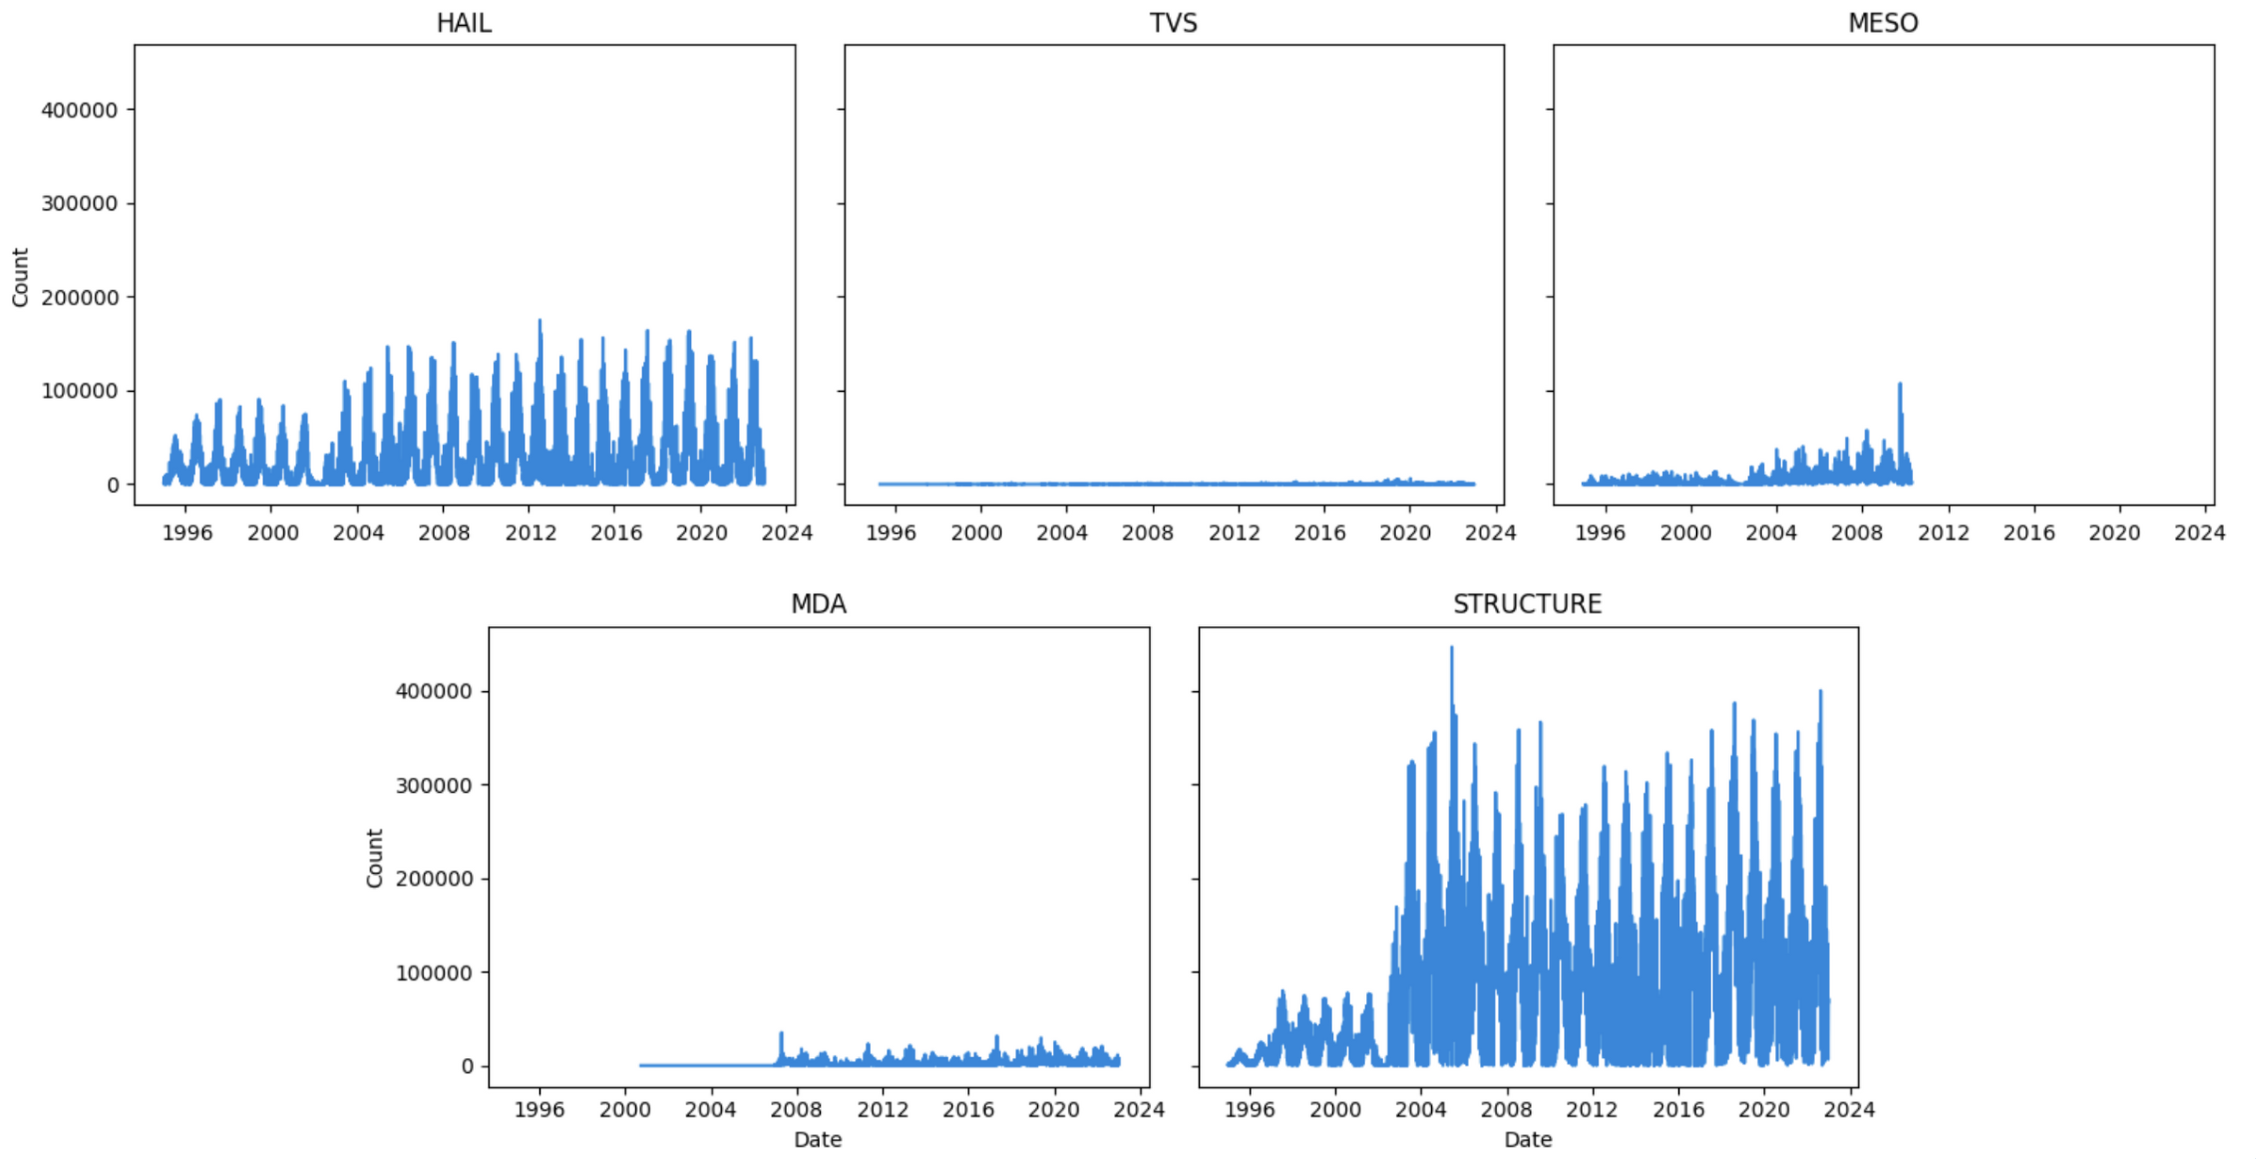

<p style='text-align:center'><b>Figure 2.</b> Frequency of Various Reports Over Time</p>

<h2 style="color: #2294ef"><b>Average Range of Devices</b></h2>

<p style="text-align: justify">
Following the investigation of class frequency, we examined the average range of weather monitoring devices identified with WSR IDs across the different classes. We generated this plot in <b>supplementary-eda.ipynb</b>. Our findings showed that devices assigned for Hail monitoring could detect events up to a nearly 200-nautical-mile radius, demonstrating their extensive range. However, for the TVS phenomena, devices needed closer proximity for accurate detection, shedding light on the contrasting detection ranges for varying weather events.
</p>

In [ ]:
hail_ave_range = hail.groupby('WSR_ID').agg(
    F.mean('RANGE').alias('AVG_RANGE')
).toPandas()
tvs_ave_range = tvs.groupby('WSR_ID').agg(
    F.mean('RANGE').alias('AVG_RANGE')
).toPandas()
meso_ave_range = meso.groupby('WSR_ID').agg(
    F.mean('RANGE').alias('AVG_RANGE')
).toPandas()
mda_ave_range = mda.groupby('WSR_ID').agg(
    F.mean('RANGE').alias('AVG_RANGE')
).toPandas()
struc_ave_range = structure.groupby('WSR_ID').agg(
    F.mean('RANGE').alias('AVG_RANGE')
).toPandas()

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), sharex=True,
                         constrained_layout=True)

bar_plot_topn_bottn(hail_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[0],
                    'AVG_RANGE', 'TOP 5 - HAIL', bott=False)
bar_plot_topn_bottn(hail_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[5],
                    'AVG_RANGE', 'BOTTOM 5 - HAIL', bott=True)

bar_plot_topn_bottn(tvs_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[1],
                    'AVG_RANGE', 'TOP 5 - TVS', bott=False)
bar_plot_topn_bottn(tvs_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[6],
                    'AVG_RANGE', 'BOTTOM 5 - TVS', bott=True)

bar_plot_topn_bottn(meso_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[2],
                    'AVG_RANGE', 'TOP 5 - MESO', bott=False)
bar_plot_topn_bottn(meso_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[7],
                    'AVG_RANGE', 'BOTTOM 5 - MESO', bott=True)

bar_plot_topn_bottn(mda_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[3],
                    'AVG_RANGE', 'TOP 5 - MDA', bott=False)
bar_plot_topn_bottn(mda_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[8],
                    'AVG_RANGE', 'BOTTOM 5 - MDA', bott=True)

bar_plot_topn_bottn(struc_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[4],
                    'AVG_RANGE', 'TOP 5 - STRUCTURE', bott=False)
bar_plot_topn_bottn(struc_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[9],
                    'AVG_RANGE', 'BOTTOM 5 - STRUCTURE', bott=True)

plt.suptitle('Average Range of Devices', fontsize=24)
plt.tight_layout()

fig.savefig('top-bott-wsrid-range.png', dpi=200)

%matplot plt

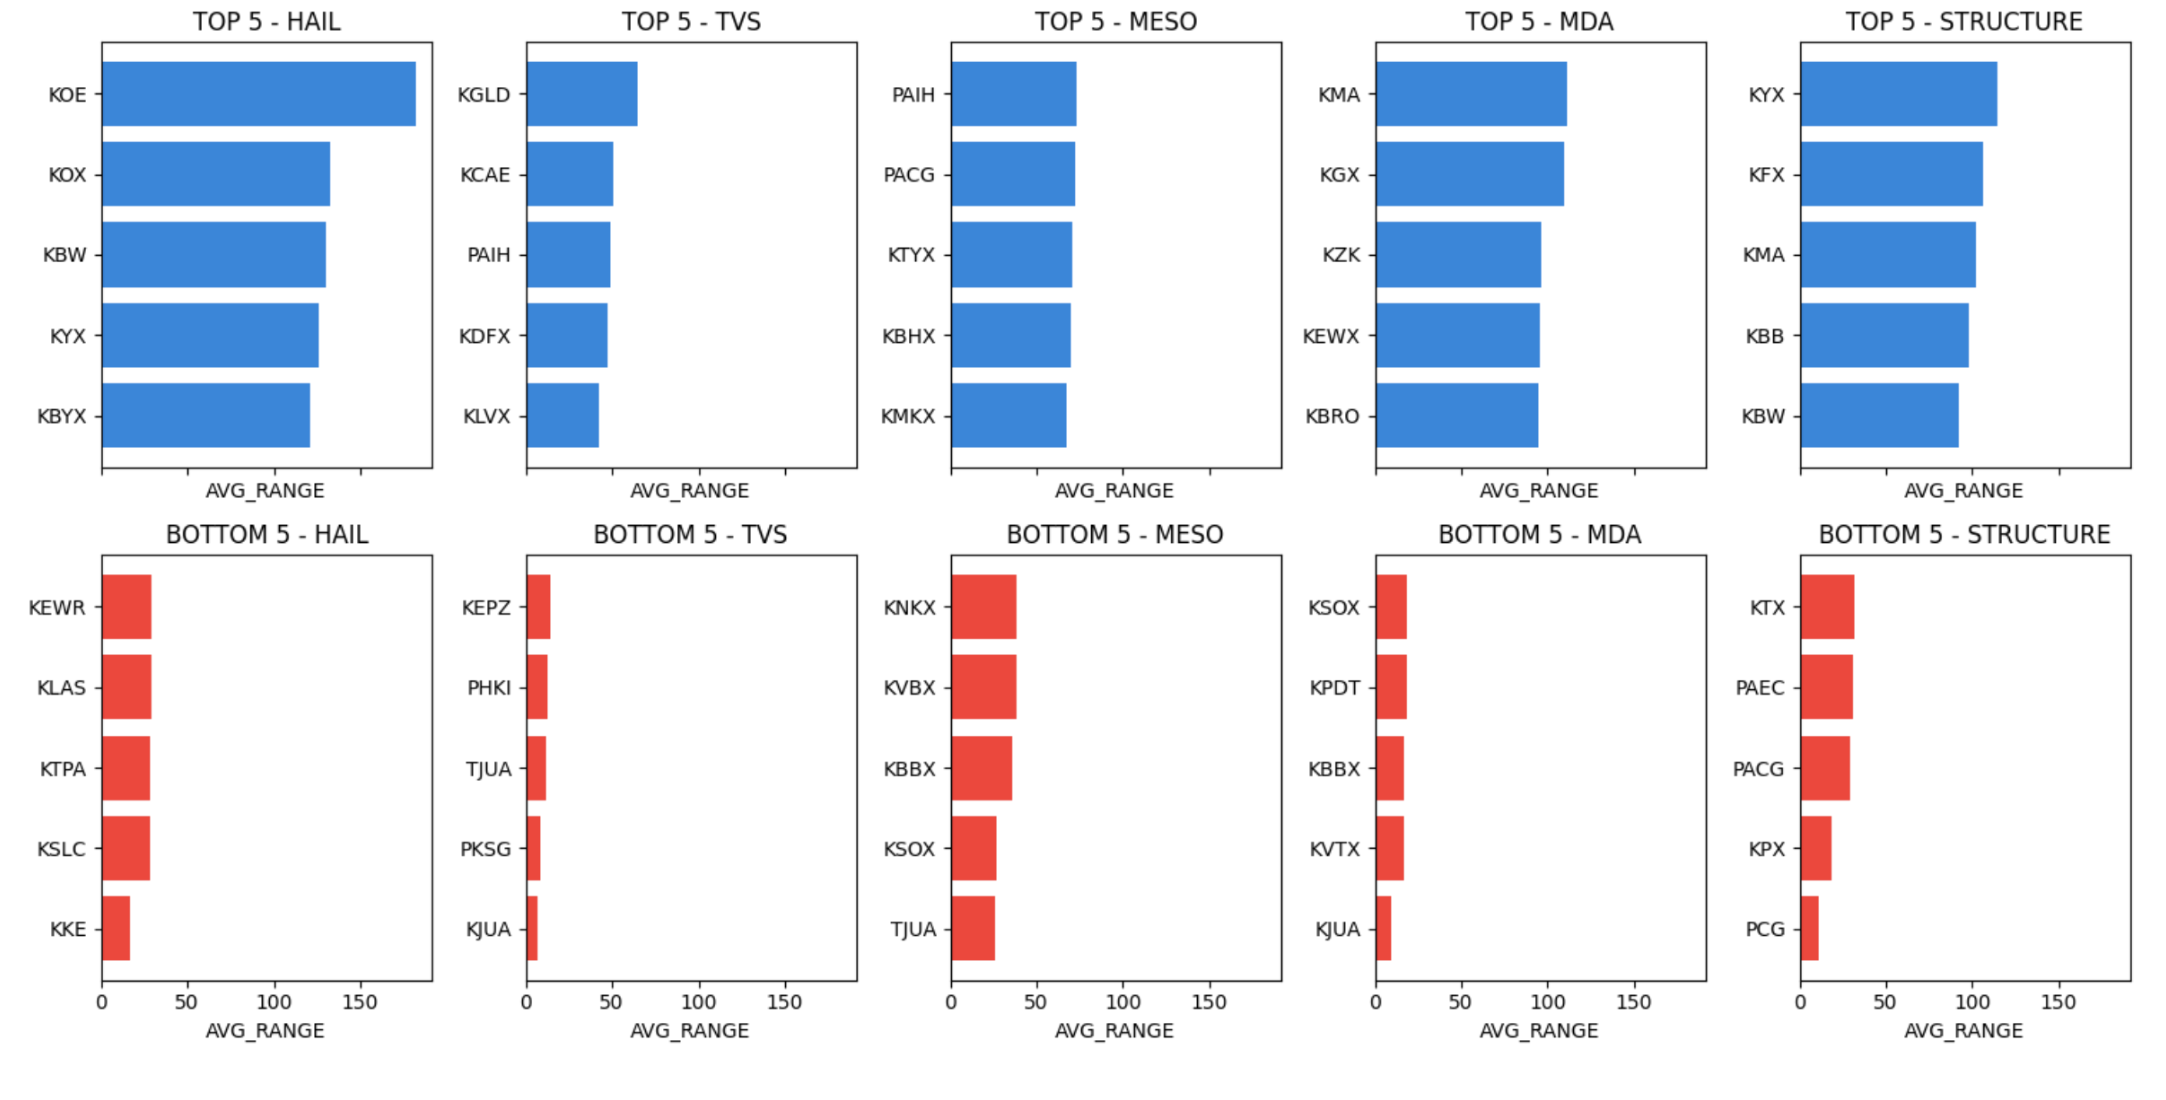

<p style='text-align:center'><b>Figure 3.</b> Average Range of Devices in Each Report</p>

<h2 style="color: #2294ef"><b>Storm Structure Heights</b></h2>

<p style="text-align: justify">
The final aspect of our exploratory data analysis involved assessing the heights of storm structures. These structures, recorded in kilo-feet (Kft), offer crucial insights into the severity of weather events. We discovered an average storm structure height of 11.64 Kft, with an average base height of 9.66 Kft and an average top height of 18.25 Kft. These measurements provide a vital understanding of the vertical extent of these storm events, essential in predicting the likelihood of severe weather events such as hailstorms. The code that generates these values are found in <b>supplementary-eda2.ipynb</b>.
</p>

In [ ]:
means = tuple(structure.select(
    F.avg('BASE_HEIGHT'),
    F.avg('TOP_HEIGHT'),
    F.avg('HEIGHT')
).first())

<p style="text-align: justify">
Our exploratory data analysis, through these steps, has unveiled essential insights into severe weather events and their detection characteristics, paving the way for effective predictive modeling.
</p>

<h1 style="color: #2294ef"><b>Results</b></h1>

<p style="text-align: justify">
The application of our Random Forest Regressor model yielded considerable insights into the prediction of severe hailstorms. This model was ran in <b>supplementary-ml.ipynb</b>.
</p>

<p style="text-align: justify">
Our model incorporated several predictors, namely spatial features, temporal features, Vertically Integrated Liquid (VIL), and cloud height. The Severity Probability (SEVPROB) was set as our target variable, aligning with our objective of predicting severe weather phenomena that generate hailstones 1 inch in diameter or larger.
</p>
    
<p style="text-align: justify">
Upon testing, we observed a Root Mean Square Error (RMSE) of $0.143$ and a Mean Absolute Error (MAE) of $0.088$. These metrics shed light on the accuracy of our model. While RMSE indicates the standard deviation of the residuals or prediction errors, MAE presents the average magnitude of errors, regardless of their direction. We deliberately did not incorporate the $R^2$ metric into our model evaluation due to the highly volatile and unpredictable nature of weather events, and the low values of RMSE and MAE suggest a solid performance of our model in predicting SEVPROB.
</p>

<h2 style="color: #2294ef"><b>Model Training</b></h2>

In [ ]:
features = ['LON', 'LAT', 'ZYEAR', 'ZMONTH', 'ZHOUR', 'RANGE_HAIL',
            'AZIMUTH_HAIL', 'RANGE_STRUCTURE', 'AZIMUTH_STRUCTURE',
            'BASE_HEIGHT', 'TOP_HEIGHT', 'VIL', 'MAX_REFLECT', 'HEIGHT']

va = VectorAssembler(
    inputCols=features,
    outputCol='features'
)

merged_df = va.transform(merged_df)
merged_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[WSR_ID: string, CELL_ID: string, ZYEAR: int, ZMONTH: int, ZDAY: int, ZHOUR: int, ZTIME: timestamp, LON_HAIL: double, LAT_HAIL: double, RANGE_HAIL: double, AZIMUTH_HAIL: double, SEVPROB: double, PROB: double, ZTIME: timestamp, LON_STRUCTURE: double, LAT_STRUCTURE: double, RANGE_STRUCTURE: double, AZIMUTH_STRUCTURE: double, BASE_HEIGHT: double, TOP_HEIGHT: double, VIL: double, MAX_REFLECT: double, HEIGHT: double, LON: double, LAT: double, features: vector]

In [ ]:
seed = 143

df_train, df_test = merged_df.randomSplit([0.7, 0.3], seed=seed)

model = RandomForestRegressor(featuresCol='features', labelCol='SEVPROB',
                              predictionCol='prediction')

model_trained = model.fit(df_train)

predictions = model_trained.transform(df_test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<h2 style="color: #2294ef"><b>Model Evaluation</b></h2>

In [ ]:
model.save('s3://bdcc2023-studio-calbao1/e-7RR2MRIR6Y0XJQ9X5DRQBRYLX/'
           'rf-untrained-2010-new')
model_trained.save('s3://bdcc2023-studio-calbao1/e-7RR2MRIR6Y0XJQ9X5DRQBRYLX/'
                   'rf-trained-2010-new')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
r2_evaluator = RegressionEvaluator(predictionCol='prediction',
                                   labelCol='SEVPROB', metricName='r2')
rmse_evaluator = RegressionEvaluator(predictionCol='prediction',
                                     labelCol='SEVPROB', metricName='rmse')
mae_evaluator = RegressionEvaluator(predictionCol='prediction',
                                    labelCol='SEVPROB', metricName='mae')

r2 = r2_evaluator.evaluate(predictions)  
rmse = rmse_evaluator.evaluate(predictions)
mae = mae_evaluator.evaluate(predictions)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
print(f'R2 = {r2}')
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

R2 = 0.3965168839601919
RMSE = 14.333321080268508
MAE  = 8.87812081823531

<h2 style="color: #2294ef"><b>Feature Importance</b></h2>

<p style="text-align: justify">
An important aspect of our model evaluation was the understanding of feature importance. The Random Forest Regressor enabled us to derive the importance of each feature, thereby providing insights into which variables were most influential in the model's predictions. The following are the top features, sorted in descending order of importance:
</p>

1. Vertically Integrated Liquid (`VIL`): This feature, representing the total water content in a vertical column of the atmosphere, plays a significant role in the formation of hail, making it a crucial factor in hailstorm prediction.
2. Max Reflection (`MAX_REFLECT`): Reflecting the highest amount of radar energy bounced back, this variable is indicative of the size of precipitation particles. Larger hailstones would reflect more energy, thus contributing to the prediction of severe hailstorms.
3. Top Height (`TOP_HEIGHT`): Referring to the maximum altitude of the storm structure, this feature is crucial as severe hailstorms are often associated with tall, powerful thunderstorms.
4. Month (`ZMONTH`): This temporal feature captures the seasonality of hailstorms, which occur more frequently during certain months due to specific climatic conditions.
5. Longitude (`LON`): The geographic location can influence the likelihood of severe hailstorms due to varying weather patterns across different regions.
6. Mean Height (`HEIGHT`): This indicates the average height of the storm structure, playing a significant role in hail formation, and thus, in the prediction of hailstorms.
7. Latitude (`LAT`): Similar to longitude, latitude can influence the occurrence of hailstorms due to regional weather patterns.

<p style="text-align: justify">
The order of feature importance aligns well with our understanding of hailstorm formation and behavior. Given the complex interrelationships within weather phenomena, the ability of our model to rank these features provides a substantial advantage in accurately predicting severe hailstorms.
</p>

In [ ]:
feat_importance = pd.DataFrame(
    sorted(zip(features, tuple(model_trained.featureImportances)),
           key=lambda x: -x[1]),
    columns=['feat', 'importance']
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

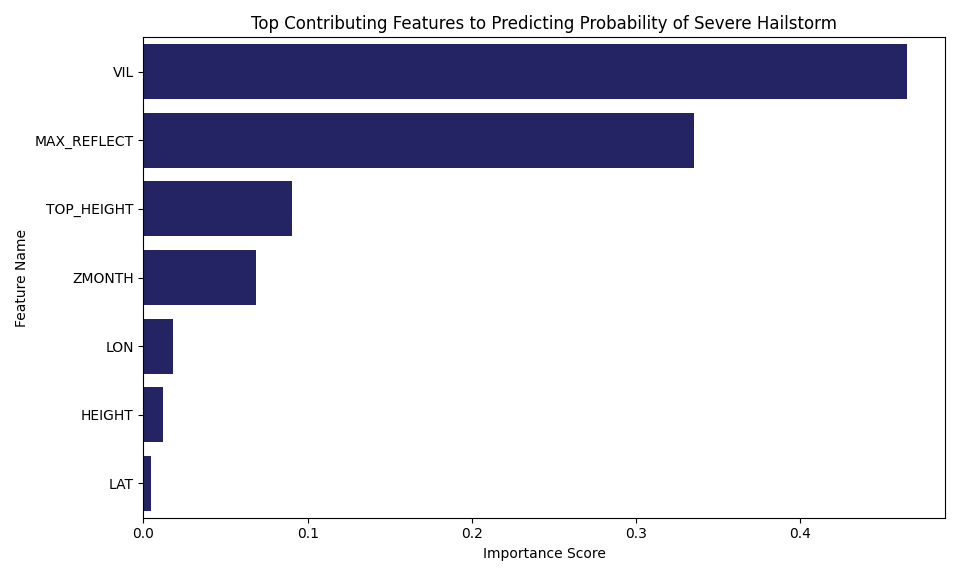

In [ ]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.2))
sns.barplot(data=feat_importance.iloc[:7], y='feat', x='importance',
            color='midnightblue')
plt.ylabel('Feature Name')
plt.xlabel('Importance Score')
plt.title('Top Contributing Features to Predicting Probability of Severe '
          'Hailstorm')
plt.tight_layout()

%matplot plt

<p style='text-align:center'><b>Figure 4.</b> Feature Importances of the Trained Random Forest Regressor</p>

<h2 style="color: #2294ef"><b>Conclusion and Recommendations</b></h2>

<p style="text-align: justify">
Our project has highlighted the potential of leveraging machine learning techniques, coupled with extensive weather data, to accurately predict severe hailstorms. Using a Random Forest Regressor model, we successfully identified key features such as Vertically Integrated Liquid (VIL), Max Reflection (MAX_REFLECT), and Top Height (TOP_HEIGHT), among others, that significantly contribute to predicting severe hailstorm events.
</p>

<p style="text-align: justify">
This work underscores the importance of not only using sophisticated machine learning techniques but also identifying and focusing on the right features in weather prediction models. The results stress the need for continued and detailed collection of data related to these key features to enhance the accuracy of hailstorm predictions.
</p>

<p style="text-align: justify">
While the model shows promise, there are always improvements to be made. In our path forward, we seek to develop our model's real-time prediction capabilities, enhance the significant features in the model, and refine the user interface and user experience for more effective communication of the model's outputs.
</p>

**_Recommendations for Future Work_**

1. *Geo-Insights*: To further improve our model and offer more precise predictions, we recommend incorporating detailed location-based figures into the data exploration phase. Focusing on specific partitions of the US map would allow us to better understand regional variations in severe hailstorm occurrences and tailor the model to these patterns.
2. *Model Enhancement*: We also recommend expanding the variables used in the model and implementing advanced machine learning algorithms, such as Long Short-Term Memory (LSTM) networks. LSTMs have shown strong performance in dealing with time series data and could enhance our model's accuracy in predicting severe hailstorms.
3. *Data Augmentation*: Lastly, we suggest incorporating additional meteorological data sources for a more comprehensive view of weather patterns and storm development. This would provide a richer dataset for our model, potentially leading to more precise and nuanced predictions of severe hailstorms.

<p style="text-align: justify">
In conclusion, while we have made significant strides in predicting severe hailstorms using machine learning, there is still room for improvement and refinement. We believe that with the recommended enhancements, the future of severe hailstorm prediction using machine learning techniques is both feasible and promising.
</p>

<h1 style="color: #2294ef"><b>References</b></h1>

[1] Hail. (2023, June 5). Retrieved from https://mrcc.purdue.edu/living_wx/hail/index.html.

[2] NOAA Severe Weather Data Inventory (SWDI). (2023, May 29). Retrieved from https://registry.opendata.aws/noaa-swdi/.

[3] Severe Weather Data Inventory (SWDI) Documentation. (2023, June 1). Retrieved from https://www.ncdc.noaa.gov/swdiws.